# Oil prices per day along 4 years.

In [1]:
import warnings; 
warnings.simplefilter('ignore')
import pandas as pd
from fbprophet import Prophet
df = pd.read_csv('oil.csv')
df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


# Remove empty cells, and rename.

In [2]:
df.columns = ["ds","y"]
df.dropna(subset = ["ds", "y"], inplace=True)
df.head()

,ds,y
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21


<AxesSubplot:xlabel='ds', ylabel='y'>

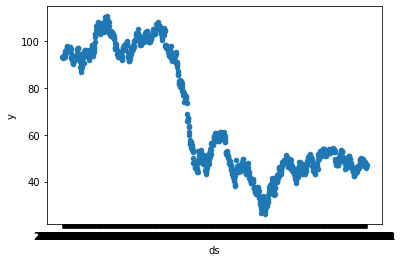

In [3]:
df_ordered = df.sort_values(["ds"])
df_ordered.plot.scatter(x="ds", y="y")

# Train the model.

In [ ]:
pro = Prophet()
model = pro.fit(df)

# Show statistics of the traning and predict next year.

In [11]:
future = model.make_future_dataframe(periods=1,freq='Y')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,95.608878,87.962010,97.226855,95.608878,95.608878,-3.018119,-3.018119,-3.018119,0.713831,0.713831,0.713831,-3.731951,-3.731951,-3.731951,0.0,0.0,0.0,92.590759
1,2013-01-03,95.587550,88.004836,97.063082,95.587550,95.587550,-3.111396,-3.111396,-3.111396,0.769874,0.769874,0.769874,-3.881270,-3.881270,-3.881270,0.0,0.0,0.0,92.476154
2,2013-01-04,95.566222,87.386120,97.270955,95.566222,95.566222,-3.306597,-3.306597,-3.306597,0.720461,0.720461,0.720461,-4.027058,-4.027058,-4.027058,0.0,0.0,0.0,92.259625
3,2013-01-07,95.502239,87.140418,96.699951,95.502239,95.502239,-3.788118,-3.788118,-3.788118,0.629245,0.629245,0.629245,-4.417362,-4.417362,-4.417362,0.0,0.0,0.0,91.714121
4,2013-01-08,95.480911,87.026415,96.426966,95.480911,95.480911,-3.815906,-3.815906,-3.815906,0.707611,0.707611,0.707611,-4.523517,-4.523517,-4.523517,0.0,0.0,0.0,91.665005


# Show next year prediction.

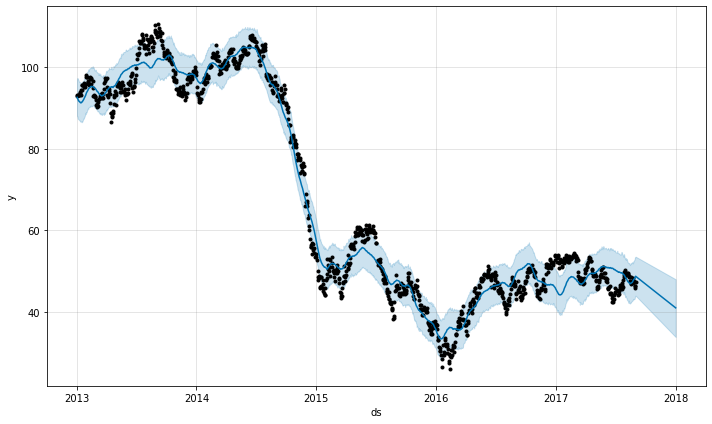

In [12]:
plot1 = pro.plot(forecast)

# Show trend, weekly and yearly components.

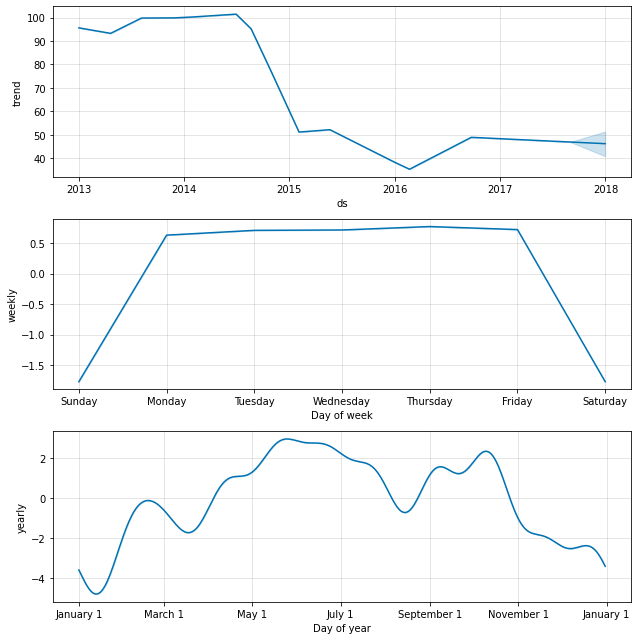

In [13]:
plt2 = pro.plot_components(forecast)